In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import getpass

In [3]:
%pip install snowflake-connector-python
%pip install "snowflake-connector-python[pandas]"
%pip install snowflake-sqlalchemy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import snowflake.connector

In [12]:
conn = snowflake.connector.connect(
        user = 'P23REM1',
        password = getpass.getpass('Your Snowflake Password: '),
        ##password='Revolt@1857',
        ##  account = https://bpbqkgp-qd32415.snowflakecomputing.com
        account = 'IIDEXEE-FP24125',
        database='RETAILS',
        schema='PUBLIC',
        warehouse='COMPUTE_WH'
  ) 

In [13]:
cur = conn.cursor()

In [14]:
select_demographic_RAW = 'SELECT * FROM demographic_RAW'
select_CAMPAIGN_DESC_RAW = 'SELECT * FROM CAMPAIGN_DESC_RAW'
select_CAMPAIGN_RAW = 'SELECT * FROM CAMPAIGN_RAW'
select_PRODUCT_RAW = 'SELECT * FROM PRODUCT_RAW'
select_COUPON_RAW = 'SELECT * FROM COUPON_RAW'
select_COUPON_REDEMPT_RAW = 'SELECT * FROM COUPON_REDEMPT_RAW'
select_TRANSACTION_RAW = 'SELECT * FROM TRANSACTION_RAW'

In [15]:
cur.execute(select_demographic_RAW)
demographic_RAW = cur.fetch_pandas_all()

In [16]:
cur.execute(select_CAMPAIGN_DESC_RAW)
CAMPAIGN_DESC_RAW = cur.fetch_pandas_all()

In [17]:
cur.execute(select_CAMPAIGN_RAW)
CAMPAIGN_RAW = cur.fetch_pandas_all()

In [18]:
cur.execute(select_PRODUCT_RAW)
PRODUCT_RAW = cur.fetch_pandas_all()

In [19]:
cur.execute(select_COUPON_RAW)
COUPON_RAW = cur.fetch_pandas_all()

In [20]:
cur.execute(select_COUPON_REDEMPT_RAW)
COUPON_REDEMPT_RAW = cur.fetch_pandas_all()

In [21]:
cur.execute(select_TRANSACTION_RAW)
TRANSACTION_RAW = cur.fetch_pandas_all()

In [22]:
cur.close()
conn.close()

## Understanding Data

The data is 3 years old hence i am taking start date as '2023-01-01'

In [23]:
from datetime import datetime,timedelta

In [24]:
start_date=pd.to_datetime('2023-01-01')

In [25]:
start_date

Timestamp('2023-01-01 00:00:00')

In [26]:
TRANSACTION_RAW ## add a new column as date and add the day from the start_date

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1918,28941588330,152,6773016,1,1.29,361,-0.20,1615,22,0,0
1,1918,28941588330,152,7441419,1,2.88,361,-1.91,1615,22,0,0
2,1918,28941588330,152,7441498,1,2.88,361,-1.91,1615,22,0,0
3,156,28941588755,152,1063359,1,0.31,361,-0.04,1714,22,0,0
4,2354,28941588778,152,829645,1,2.99,361,0.00,1716,22,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1146416,2084,32185221922,353,690927,1,2.23,224,-2.24,1900,51,0,0
1146417,2084,32185221922,353,709420,2,5.00,224,-1.98,1900,51,0,0
1146418,2084,32185221922,353,801497,1,0.99,224,0.00,1900,51,0,0
1146419,2084,32185221922,353,9336100,1,1.50,224,0.00,1900,51,0,0


In [27]:
TRANSACTION_RAW['Date']=start_date+pd.to_timedelta(TRANSACTION_RAW['DAY'],unit='d')


In [28]:
COUPON_REDEMPT_RAW ## here also add the Day with start_date and add the column as date


,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18
...,...,...,...,...
2313,2496,592,54900050076,18
2314,2496,610,55100000013,18
2315,2500,449,53663200076,8
2316,2500,449,54300031076,8


In [29]:
COUPON_REDEMPT_RAW['Date']=start_date+pd.to_timedelta(COUPON_REDEMPT_RAW['DAY'],unit='D')

In [30]:
CAMPAIGN_DESC_RAW['Start_Date']=start_date+pd.to_timedelta(CAMPAIGN_DESC_RAW['START_DAY'],unit='D')
CAMPAIGN_DESC_RAW['End_Date']=start_date+pd.to_timedelta(CAMPAIGN_DESC_RAW['END_DAY'],unit='D')


In [31]:
CAMPAIGN_DESC_RAW['Duration']=CAMPAIGN_DESC_RAW['END_DAY']-CAMPAIGN_DESC_RAW['START_DAY']

In [32]:
demographic_RAW['HOUSEHOLD_KEY'].count()

2500

In [88]:
TRANSACTION_RAW['Total']=TRANSACTION_RAW['SALES_VALUE']*TRANSACTION_RAW['QUANTITY']
TRANSACTION_RAW.rename(columns={'Total':'TOTAL'},inplace=True)

### There are total 2500 unique households

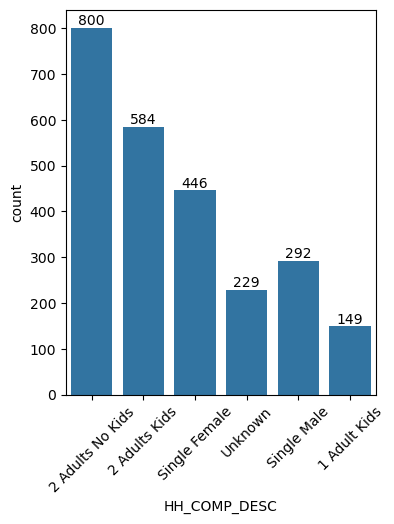

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(4,5))
bh = sns.countplot(data=demographic_RAW, x='HH_COMP_DESC')
plt.xticks(rotation=45)

plt.bar_label(bh.containers[0], label_type='edge')

plt.show()


### Out of the total 2,500 households,

- 2 Adults and No Kids form the largest share (32%),
- followed by 2 Adults with Kids (23.4%),
- and Single Female households (17.8%).

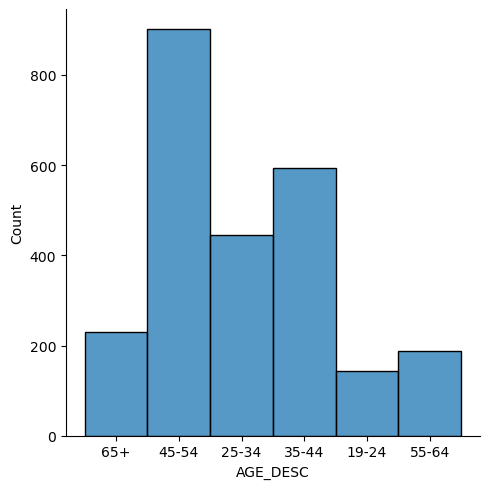

In [34]:
sns.displot(data=demographic_RAW,x=demographic_RAW['AGE_DESC'],kind='hist')
plt.show()

Among the 2,500 retail customers:
- 36.04% are aged 45–54, making this the largest age segment.
- 23.76% are aged 35–44.
- 17.80% fall in the 25–34 age range.
- Only 5.72% are aged 19–24, representing the smallest share of the customer base.

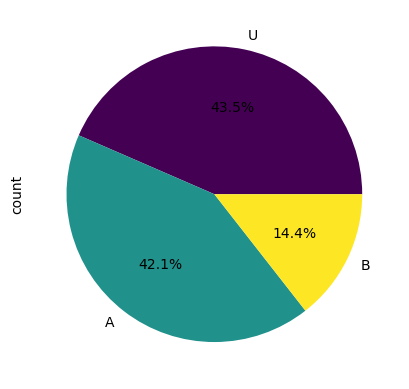

In [35]:
bh=demographic_RAW['MARITAL_STATUS_CODE'].value_counts().plot(kind='pie',colormap='viridis',autopct='%1.1f%%')
plt.xticks(rotation=0)
plt.show()

Out of 2,500 retail customers:
- 43.5% are unmarried.
- 42.1% are married.
- 14.4% are single or divorced.

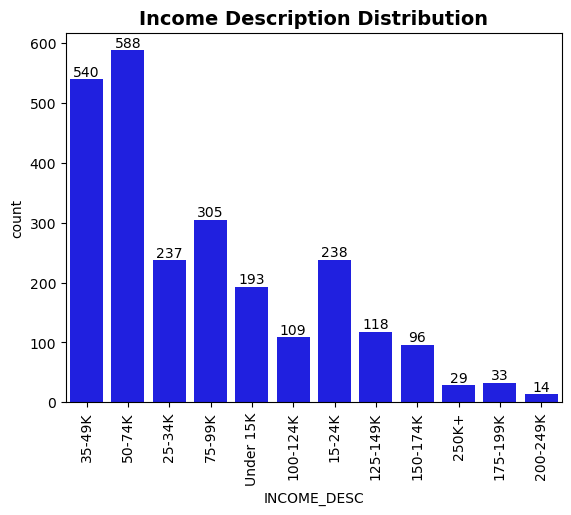

In [36]:
bh = sns.countplot(
    data=demographic_RAW,
    x='INCOME_DESC',  
    color='blue'
)

plt.xticks(rotation=90)
for container in bh.containers:
    plt.bar_label(container, label_type='edge')
plt.title("Income Description Distribution", fontdict={'weight': 'bold', 'size': 14})
plt.show()


Among 2500 retail customer
- 23.52 % of the customers earn between 50-74K .
- 21.60 % of them earn between 35-49 k and 12.2 % of them earn between 75-99 k .

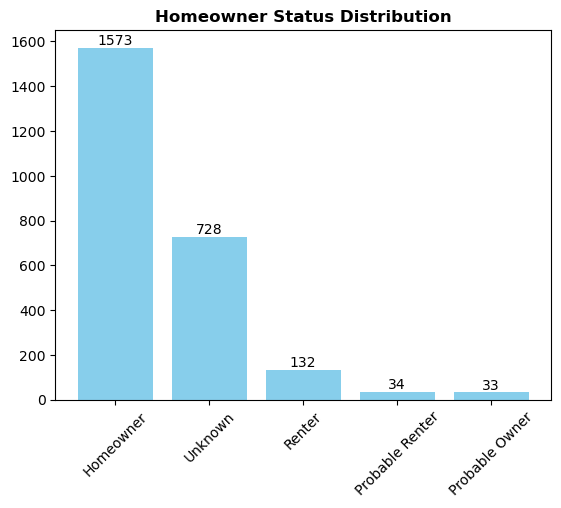

In [37]:
counts = demographic_RAW['HOMEOWNER_DESC'].value_counts()
plt.bar(x=counts.index, height=counts.values, color='skyblue')
plt.xticks(rotation=45)
for i, val in enumerate(counts.values):
    plt.text(i, val, str(val), ha='center', va='bottom')

plt.title("Homeowner Status Distribution", fontweight='bold')
plt.show()


In [38]:
counts.values*100/2500

array([62.92, 29.12,  5.28,  1.36,  1.32])

- 62.92 % of total retail customer definitely own a house and 1.32 % are probably the owner .
- 29.12 % are living in rented apartment/house .

In [39]:
len(CAMPAIGN_DESC_RAW['CAMPAIGN'].unique())

30

30 Marketing Campaigns occours till today.

In [40]:
(
    CAMPAIGN_DESC_RAW
    .assign(duration=CAMPAIGN_DESC_RAW['END_DAY'] - CAMPAIGN_DESC_RAW['START_DAY'])
    .groupby('DESCRIPTION', as_index=False)['duration']
    .mean()
    .rename(columns={'duration': 'avg_duration'})
)


,DESCRIPTION,avg_duration
0,TypeA,47.200000
1,TypeB,37.631579
2,TypeC,74.500000


Average duration for -:
- A is 47 days.
- B is 37 days.
- C is 74 days.


In [41]:
str(len(CAMPAIGN_RAW['HOUSEHOLD_KEY'].unique())*100/len(demographic_RAW['HOUSEHOLD_KEY'].unique()))+"%"

'63.36%'

Among 2500 Household the compaign has managed to penetrate upto 63.36% of the households.

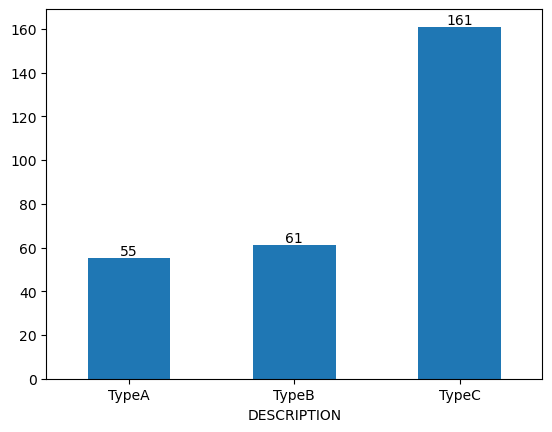

In [42]:
bh=CAMPAIGN_DESC_RAW.groupby(by='DESCRIPTION')['Duration'].apply(lambda x:max(x)).plot(kind='bar')
plt.xticks(rotation=0)
plt.bar_label(container=bh.containers[0],label_type='edge')
plt.show()

TypeC Campaign runs for the longest period of time (161 days) while TypeB (61 days) and TypeA (55 Days).

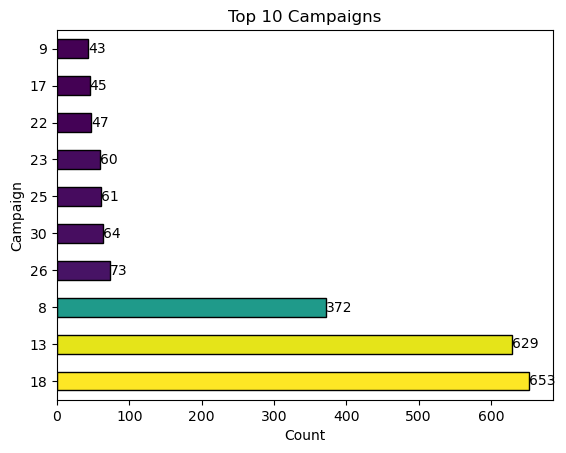

In [43]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors
data = COUPON_REDEMPT_RAW['CAMPAIGN'].value_counts().sort_values(ascending=False).head(10)

norm = mcolors.Normalize(vmin=min(data), vmax=max(data))

colors = cm.viridis(norm(data))
bh=data.plot(kind='barh', color=colors, edgecolor='black')
plt.xlabel("Count")
plt.bar_label(container=bh.containers[0],label_type='edge')
plt.ylabel("Campaign")
plt.title("Top 10 Campaigns")
plt.show()

Analysis of coupon redemptions indicates that Campaigns 18, 13, 8, and 26 were the most impactful in driving customer engagement.
- Campaign 18: Influenced 653 customers to redeem coupons — the highest among all campaigns.
- Campaign 13: Led to 629 redemptions, closely following Campaign 18 in effectiveness.
- Campaign 8: Generated 372 redemptions, demonstrating moderate impact.


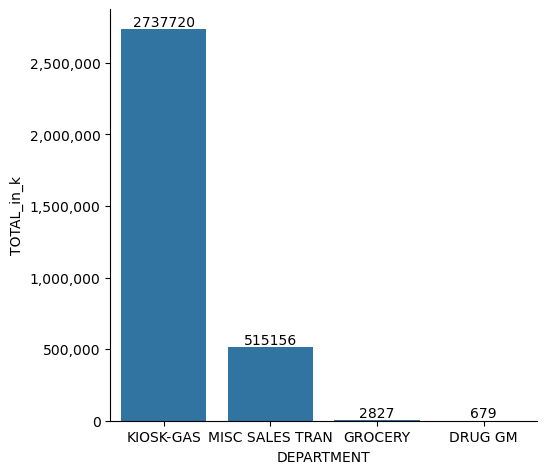

In [89]:
import matplotlib.ticker as mtick
temp = (
    pd.merge(TRANSACTION_RAW, PRODUCT_RAW, on='PRODUCT_ID', how='inner')
      .assign(TOTAL_in_k=lambda df: df['TOTAL']/ 1000)
      .groupby('DEPARTMENT')[['QUANTITY', 'SALES_VALUE', 'TOTAL_in_k']]
      .sum()
      .sort_values(by='TOTAL_in_k', ascending=False)
      .head(4)
      .reset_index()  # Now DEPARTMENT is a column
)

g=sns.catplot(data=temp, x='DEPARTMENT', y='TOTAL_in_k', kind='bar')
g.ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax = g.axes[0, 0]
ax.bar_label(ax.containers[0], fmt='%.0f')
plt.show()

Almost 82% of the sales comes from KIOSK-GAS Department and 12-13% of the Sales from MISC SALES TRAN.

<Axes: ylabel='PRODUCT_ID'>

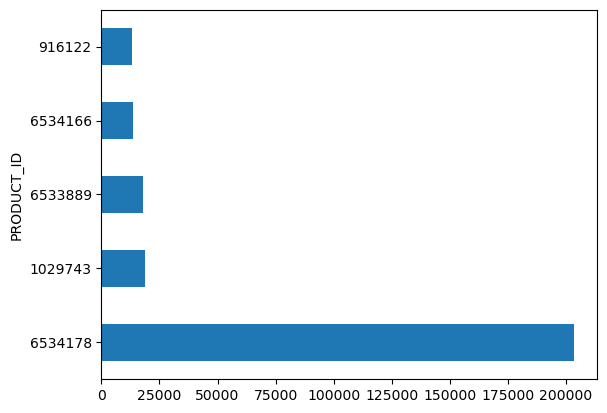

In [45]:
## Top Selling products
temp2=pd.merge(left=PRODUCT_RAW,right=TRANSACTION_RAW,on='PRODUCT_ID').groupby(by='PRODUCT_ID')['SALES_VALUE'].agg(func='sum').sort_values(ascending=False).head(20)
temp2.head(5).plot(kind='barh')

Product with PRODUCT_ID=6534178 is the highest selling products.

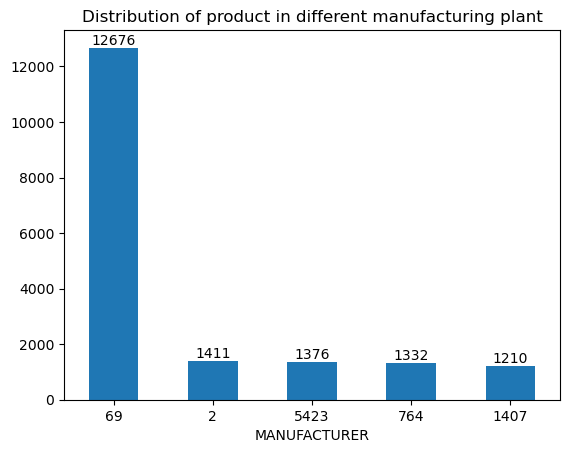

In [46]:
ax=PRODUCT_RAW.groupby('MANUFACTURER')['PRODUCT_ID'].nunique().sort_values(ascending=False).head(5).plot(kind='bar',title='Distribution of product in different manufacturing plant')
plt.xticks(rotation=0)
plt.bar_label(container=ax.containers[0],label_type='edge',fmt='%.0f')
plt.show()

Manufacturing plant having ID 69 manufactures the highest number of product(14%).

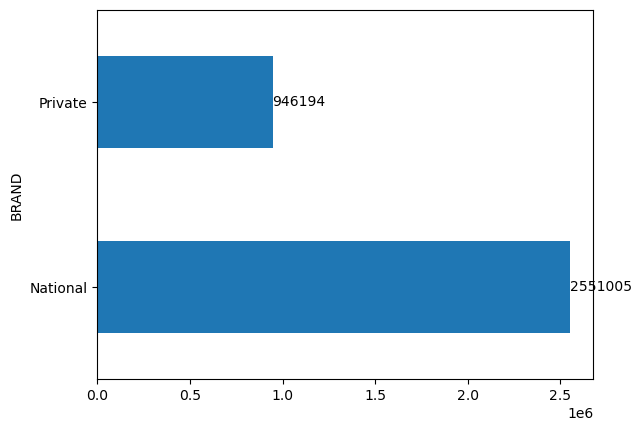

In [47]:
## Top Selling products
temp2=pd.merge(left=PRODUCT_RAW,right=TRANSACTION_RAW,on='PRODUCT_ID').groupby(by='BRAND')['SALES_VALUE'].agg(func='sum').sort_values(ascending=False)
ax=temp2.plot(kind='barh')
plt.bar_label(container=ax.containers[0],label_type='edge',fmt='%.0f')
plt.show()

Company' Sales mostly comes from National brand(~73%,2.551 M) and a Private Brand contributes significantly to overall Sales(almost 27 %,~ 1M). 

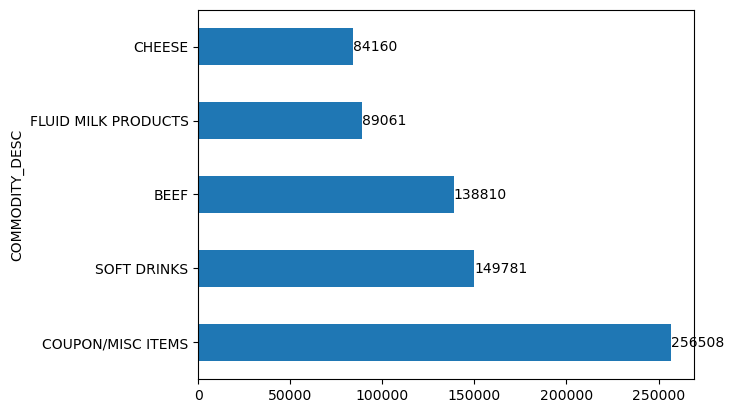

In [48]:
ax=pd.merge(left=PRODUCT_RAW,right=TRANSACTION_RAW,on='PRODUCT_ID').groupby(by='COMMODITY_DESC')['SALES_VALUE'].apply(lambda X:sum(X)).sort_values(ascending=False).head(5).plot(kind='barh')
plt.bar_label(container=ax.containers[0],label_type='edge',fmt='%.0f')
plt.show()

Top 5 COMMODITY_DESC by Sales are -:
- Coupon/Misc items
- Fuel
- Soft drinks
- Beef
- Fluid milk products

In [49]:
## Overall Revenue
sum(TRANSACTION_RAW['SALES_VALUE'])/pow(10,6) 

3.49719888

Total Revenue is 3.5 Million.

In [50]:
sum(TRANSACTION_RAW['SALES_VALUE'])/TRANSACTION_RAW['BASKET_ID'].nunique()

28.185032882011605

Average Sales Value per basket is 28.185.

In [82]:
TRANSACTION_RAW['Week_day']=TRANSACTION_RAW['Date'].dt.day_of_week
COUPON_REDEMPT_RAW['Week_day']=COUPON_REDEMPT_RAW['Date'].dt.day_of_week

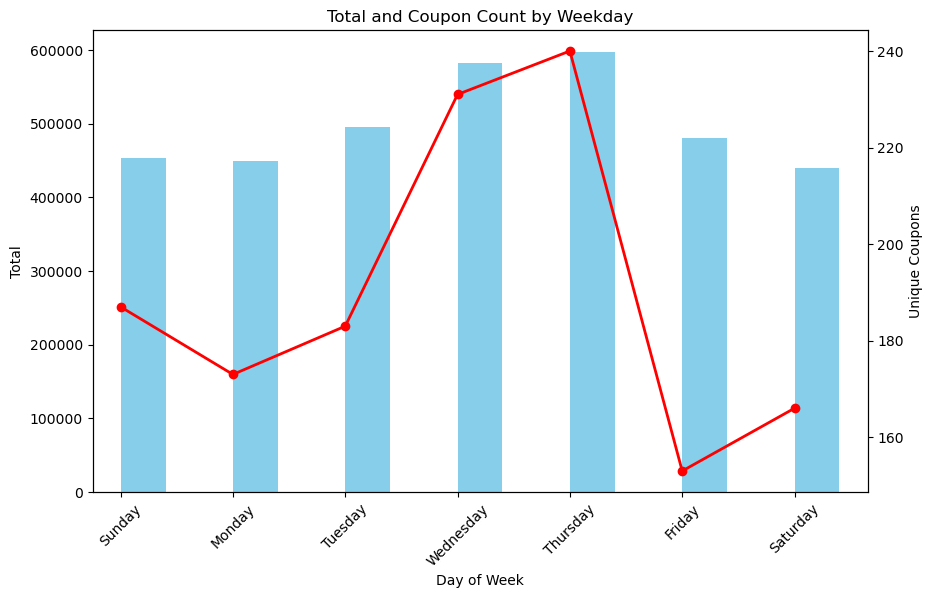

In [83]:
total_by_day = TRANSACTION_RAW.groupby('Week_day')['SALES_VALUE'].sum()
coupon_by_day = COUPON_REDEMPT_RAW.groupby(by='Week_day')['COUPON_UPC'].nunique()
day_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
fig, ax1 = plt.subplots(figsize=(10,6))
total_by_day.plot(kind='bar', ax=ax1, color='skyblue', width=0.4, position=0)
ax1.set_ylabel('Total')
ax1.set_xlabel('Day of Week')
ax1.set_xticks(range(7))
ax1.set_xticklabels(day_labels, rotation=45)
ax1.set_title('Total and Coupon Count by Weekday')
ax2 = ax1.twinx()
coupon_by_day.plot(kind='line', ax=ax2, color='red', marker='o', linewidth=2)
ax2.set_ylabel('Unique Coupons')

plt.show()


The customer are purchasing almost in a similar pattern in the weekdays while most of the coupan redemption occours in Wednesday and Thrusday.

In [53]:
## Total Quantity Sold
TRANSACTION_RAW['QUANTITY'].sum()/pow(10,6)

108.534329

Total 108.54 Million products get sold till today.

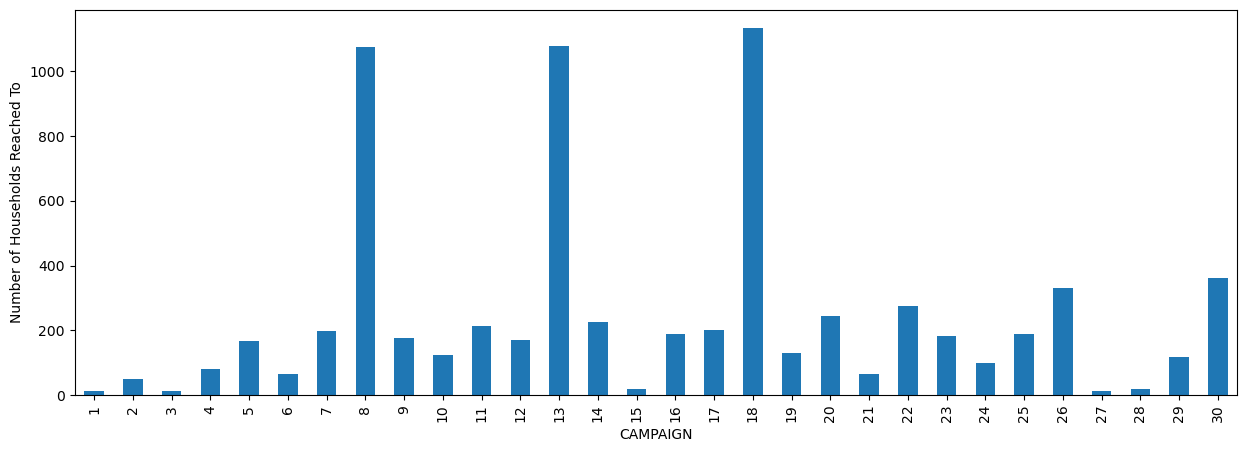

In [54]:
plt.figure(figsize=(15,5))
CAMPAIGN_RAW.groupby(by='CAMPAIGN')['HOUSEHOLD_KEY'].nunique().plot(kind='bar')
plt.ylabel('Number of Households Reached To')
plt.show()

In Campaign 18 maximum number of households participated.

In [55]:
Coupon_given=COUPON_RAW.groupby("CAMPAIGN").aggregate(Total_product = ('PRODUCT_ID','nunique'),
                                                    Total_Coupon_Given = ('COUPON_UPC','nunique'))

In [56]:
Coupon_given.merge(right = CAMPAIGN_DESC_RAW,on='CAMPAIGN',how='left')

,CAMPAIGN,Total_product,Total_Coupon_Given,DESCRIPTION,START_DAY,END_DAY,Start_Date,End_Date,Duration
0,1,383,11,TypeB,346,383,2023-12-13,2024-01-19,37
1,2,301,16,TypeB,351,383,2023-12-18,2024-01-19,32
2,3,506,34,TypeC,356,412,2023-12-23,2024-02-17,56
3,4,200,12,TypeB,372,404,2024-01-08,2024-02-09,32
4,5,443,11,TypeB,377,411,2024-01-13,2024-02-16,34
5,6,18,1,TypeC,393,425,2024-01-29,2024-03-01,32
6,7,259,8,TypeB,398,432,2024-02-03,2024-03-08,34
7,8,17178,209,TypeA,412,460,2024-02-17,2024-04-05,48
8,9,825,18,TypeB,435,467,2024-03-11,2024-04-12,32
9,10,393,14,TypeB,463,495,2024-04-08,2024-05-10,32


campaign 13,18,8 are the one with most product in them.

In [57]:
## TOP 10 Product where Coupon is applied
coupon_product = COUPON_RAW.merge(right=PRODUCT_RAW,on='PRODUCT_ID',how='left')

Text(0.5, 1.0, 'Top 10 Product where Coupon is applied most')

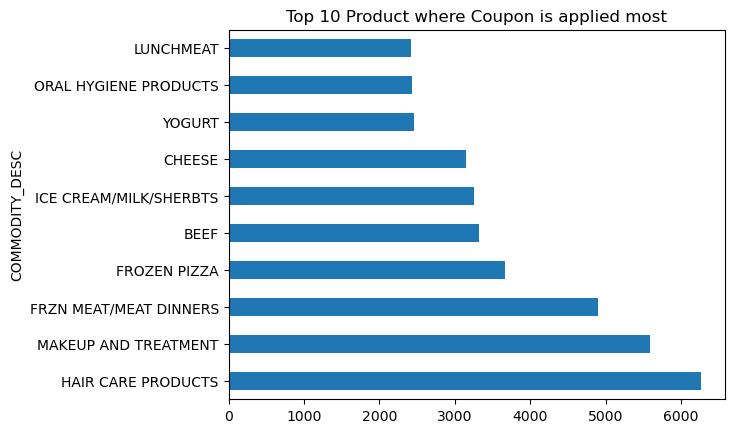

In [58]:
coupon_product['COMMODITY_DESC'].value_counts().head(10).plot(kind='barh')
plt.title(label='Top 10 Product where Coupon is applied most')

Hair care products, makeup and treatment, Frozen meat are the most prominent product where the coupon applied is highest.

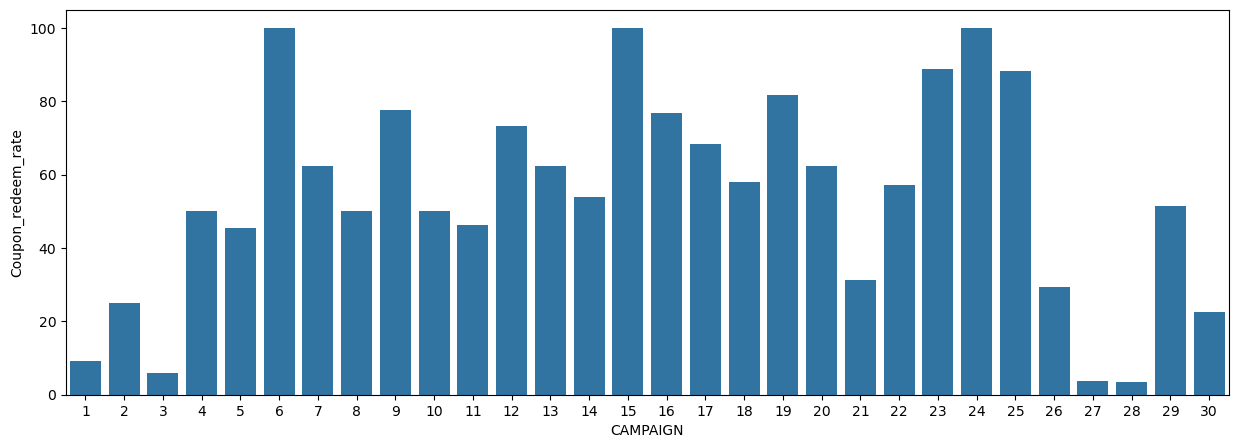

In [59]:
Coupon_redeem = COUPON_REDEMPT_RAW.groupby('CAMPAIGN').agg(total_coupon_reedm=('COUPON_UPC','nunique'))
Coupon_redeem = Coupon_redeem.merge(right = Coupon_given,on='CAMPAIGN',how='left')
Coupon_redeem['Coupon_redeem_rate']=(Coupon_redeem['total_coupon_reedm']/Coupon_redeem['Total_Coupon_Given'])*100
plt.figure(figsize=(15,5))
sns.barplot(x='CAMPAIGN',y='Coupon_redeem_rate',data=Coupon_redeem)
plt.show()

Campaign 6,15,24 are the most effective campaign as the coupan redemption rate is 100%( All the household that participated in this campaign end up using the Coupon).

In [60]:
basket=TRANSACTION_RAW.groupby(by='BASKET_ID').aggregate(SALES_VALUE=("SALES_VALUE",'sum'),COUPON_DISC=("COUPON_DISC",'sum'),COUPON_MATCH_DISC=("COUPON_MATCH_DISC",'sum'))
basket['COUPAN_REDEEM']=basket['COUPON_DISC']!=0

In [61]:
basket.head()

,SALES_VALUE,COUPON_DISC,COUPON_MATCH_DISC,COUPAN_REDEEM
BASKET_ID,,,,
26984851472,5.91,0,0,False
26984851516,12.43,0,0,False
26984896261,11.37,0,0,False
26984905972,2.55,0,0,False
26984945254,3.53,0,0,False


In [62]:
basket.groupby('COUPAN_REDEEM').aggregate( sales_mean=('SALES_VALUE','mean'),
                                             COUPON_DISC_mean =('COUPON_DISC','mean'),
                                             COUPON_MATCH_DISC=('COUPON_MATCH_DISC','mean'),
                                             No_coupon  =('SALES_VALUE','count'))

,sales_mean,COUPON_DISC_mean,COUPON_MATCH_DISC,No_coupon
COUPAN_REDEEM,,,,
False,26.102495,0.000000,-0.000034,117636
True,66.202017,-2.767846,-0.424271,6444


- The average sales value per basket when coupon is used is 66.20.
- The average sales value per basket when coupon is not used is 26.10. 
#### It shows customer buys more when coupan is given to them.

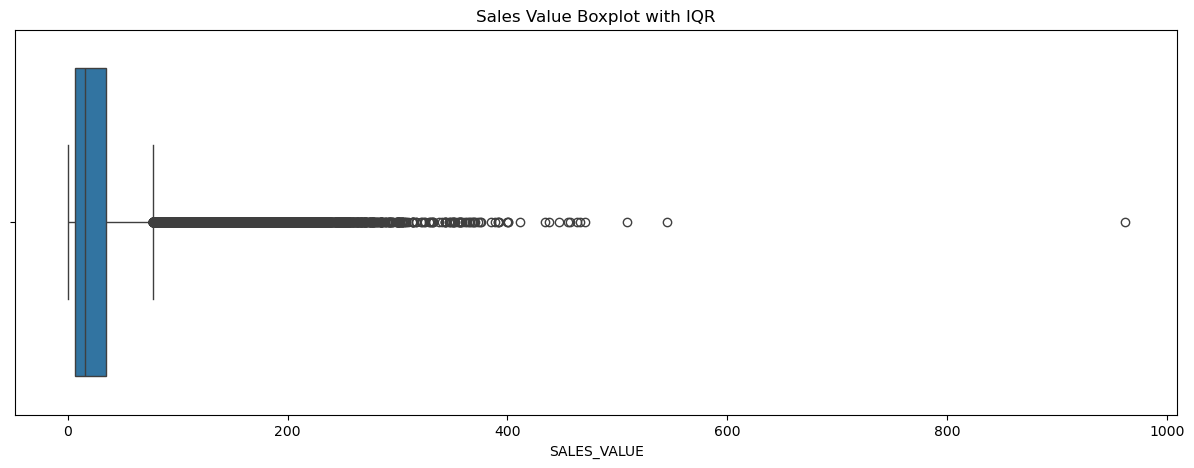

In [63]:
plt.figure(figsize=(15,5))
sns.boxplot(data=basket,x='SALES_VALUE')
plt.title('Sales Value Boxplot with IQR')
plt.show()

### Discriptive Analysis
Explore demographic characteristics such as age distribution, marital
status, income levels, homeownership, household composition,
household size, and kid categories.

In [64]:
demographic_RAW.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,HOUSEHOLD_KEY
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


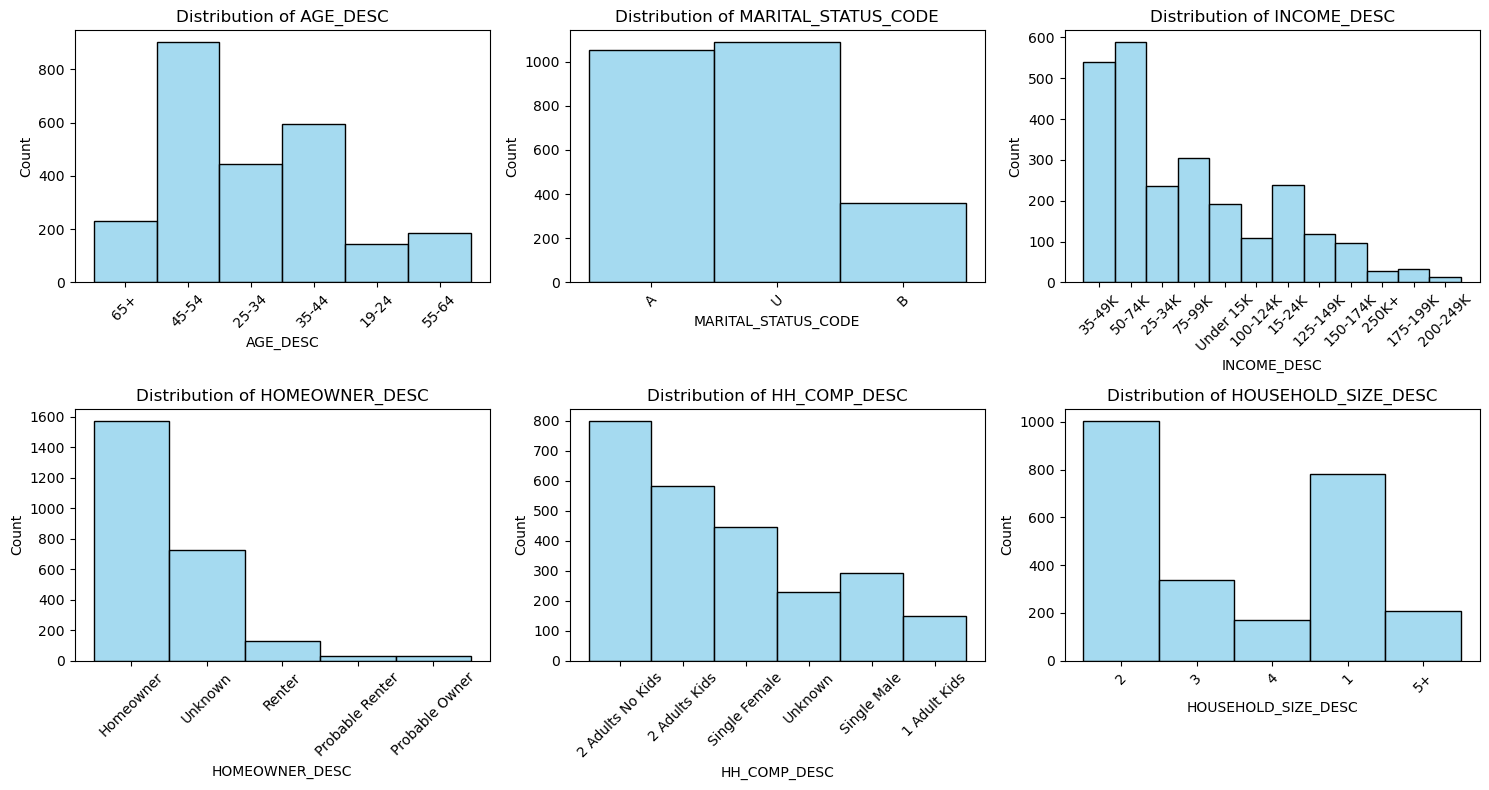

In [65]:
cat_cols = demographic_RAW.select_dtypes(include=['object', 'category']).columns[:6]
rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.histplot(data=demographic_RAW, x=col, discrete=True, ax=axes[i],color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any empty subplots
for j in range(len(cat_cols), rows*cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


- Income distribution analysis reveals that the 50–74K bracket represents the largest share of customers, with the 35–49K segment ranking second in prominence.
- The analysis shows that among all retail customers, those aged 45–54 have the highest purchase activity.
- Among all 2500 Household, the house having 2 Adult and no kids are the largest chunk of customer .
- Household of size 2 is highest among all the household.

### Analyze campaign descriptions and duration.

In [66]:
CAMPAIGN_DESC_RAW.groupby(by='DESCRIPTION').agg(Average_duration=('Duration','mean'))

,Average_duration
DESCRIPTION,
TypeA,47.200000
TypeB,37.631579
TypeC,74.500000


In [67]:
merge_product_trans=pd.merge(left=PRODUCT_RAW,right=TRANSACTION_RAW,on='PRODUCT_ID',how='inner')[['PRODUCT_ID','COMMODITY_DESC','COUPON_DISC','COUPON_MATCH_DISC','SALES_VALUE','DEPARTMENT','QUANTITY']]
merge_product_trans['Coupon_use']=merge_product_trans['COUPON_DISC']!=0
temp_table=merge_product_trans.groupby(by='COMMODITY_DESC').agg({'COUPON_DISC':'sum','COUPON_MATCH_DISC':'sum','SALES_VALUE':'sum','QUANTITY':'sum','Coupon_use':'sum'})

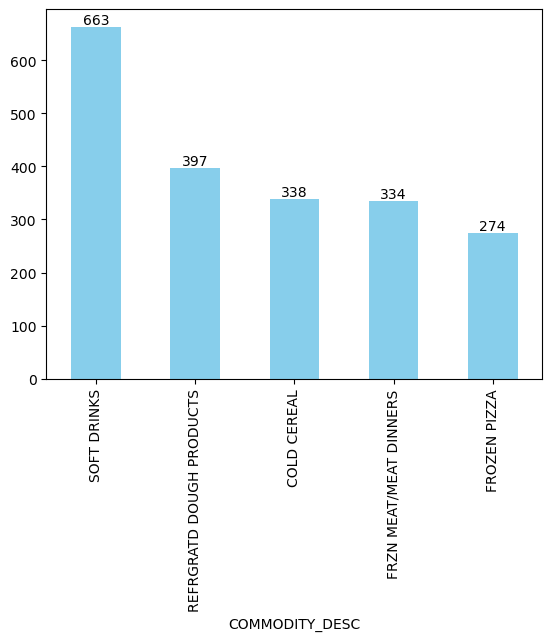

In [68]:
ax=temp_table[temp_table.index!=' '].sort_values(by='Coupon_use',ascending=False)['Coupon_use'].head(5).plot(kind='bar',color='skyblue')
plt.bar_label(container=ax.containers[0],label_type='edge')
plt.show()

- For buying softdrinks people have used maximum number of Coupon and then REFRGATD DOUGH PRODUCTS and COLD CEREALS.

## Explore the correlation between Sales and discounts

In [69]:
TRANSACTION_RAW_temp=TRANSACTION_RAW

In [70]:
TRANSACTION_RAW_temp['COUPON_MATCH_DISC']=TRANSACTION_RAW_temp['COUPON_MATCH_DISC']*-1
TRANSACTION_RAW_temp['COUPON_DISC']=TRANSACTION_RAW_temp['COUPON_DISC']*-1

In [96]:
DESC_CASE=TRANSACTION_RAW_temp.merge(right=demographic_RAW,on='HOUSEHOLD_KEY')[['HOUSEHOLD_KEY','PRODUCT_ID','QUANTITY','SALES_VALUE','RETAIL_DISC','AGE_DESC','MARITAL_STATUS_CODE','INCOME_DESC','HOUSEHOLD_SIZE_DESC','HH_COMP_DESC','COUPON_DISC','COUPON_MATCH_DISC']]

In [97]:
DESC_CASE_2=DESC_CASE=DESC_CASE.merge(right=COUPON_REDEMPT_RAW,on='HOUSEHOLD_KEY')

In [98]:
DESC_CASE_2.drop(columns=['Date','DAY'],inplace=True)

In [99]:
DESC_CASE_2

,HOUSEHOLD_KEY,PRODUCT_ID,QUANTITY,SALES_VALUE,RETAIL_DISC,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOUSEHOLD_SIZE_DESC,HH_COMP_DESC,COUPON_DISC,COUPON_MATCH_DISC,COUPON_UPC,CAMPAIGN,Week_day
0,156,1063359,1,0.31,-0.04,45-54,A,75-99K,2,2 Adults No Kids,0,0,55150026055,13,5
1,156,1063359,1,0.31,-0.04,45-54,A,75-99K,2,2 Adults No Kids,0,0,53620064076,17,2
2,1778,823718,1,0.69,0.00,25-34,A,35-49K,2,2 Adults No Kids,0,0,52484270076,8,3
3,1778,823718,1,0.69,0.00,25-34,A,35-49K,2,2 Adults No Kids,0,0,10000085429,13,3
4,1778,823718,1,0.69,0.00,25-34,A,35-49K,2,2 Adults No Kids,0,0,10000089106,13,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418271,2084,801497,1,0.99,0.00,55-64,A,125-149K,2,2 Adults No Kids,0,0,55000013950,18,2
2418272,2084,9336100,1,1.50,0.00,55-64,A,125-149K,2,2 Adults No Kids,0,0,10000085425,13,6
2418273,2084,9336100,1,1.50,0.00,55-64,A,125-149K,2,2 Adults No Kids,0,0,55000013950,18,2
2418274,2084,8180604,1,1.50,-0.39,55-64,A,125-149K,2,2 Adults No Kids,0,0,10000085425,13,6


In [100]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ['AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOUSEHOLD_SIZE_DESC', 'HH_COMP_DESC']
le = LabelEncoder()
for col in cat_cols:
    DESC_CASE_2[col] = le.fit_transform(DESC_CASE_2[col].astype(str))  # convert to str to handle NaN


In [101]:
DESC_CASE_2.drop(columns=['PRODUCT_ID','HOUSEHOLD_KEY','COUPON_UPC'],inplace=True)

In [102]:
DESC_CASE_2

,QUANTITY,SALES_VALUE,RETAIL_DISC,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOUSEHOLD_SIZE_DESC,HH_COMP_DESC,COUPON_DISC,COUPON_MATCH_DISC,CAMPAIGN,Week_day
0,1,0.31,-0.04,3,0,10,1,2,0,0,13,5
1,1,0.31,-0.04,3,0,10,1,2,0,0,17,2
2,1,0.69,0.00,1,0,8,1,2,0,0,8,3
3,1,0.69,0.00,1,0,8,1,2,0,0,13,3
4,1,0.69,0.00,1,0,8,1,2,0,0,13,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2418271,1,0.99,0.00,4,0,1,1,2,0,0,18,2
2418272,1,1.50,0.00,4,0,1,1,2,0,0,13,6
2418273,1,1.50,0.00,4,0,1,1,2,0,0,18,2
2418274,1,1.50,-0.39,4,0,1,1,2,0,0,13,6


In [103]:
from sqlalchemy import create_engine

In [105]:
pip install pymysql


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sqlalchemy import create_engine
import urllib.parse
user = "root"
password = urllib.parse.quote_plus("Premgolu@123")
host = "localhost"
database = "retail_data"

# Create connection engine
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}/{database}")

# Insert into table
CAMPAIGN_DESC_RAW.to_sql("CAMPAIGN_DESC_RAW", con=engine, if_exists="append", index=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_25640\3710846429.py:12: UserWarning: The provided table name 'CAMPAIGN_DESC_RAW' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  CAMPAIGN_DESC_RAW.to_sql("CAMPAIGN_DESC_RAW", con=engine, if_exists="append", index=False)


30

In [ ]:
CAMPAIGN_RAW.to_sql("CAMPAIGN_RAW", con=engine, if_exists="append", index=False)
COUPON_RAW.to_sql("COUPON_RAW", con=engine, if_exists="append", index=False)
COUPON_REDEMPT_RAW.to_sql("COUPON_REDEMPT_RAW", con=engine, if_exists="append", index=False)
PRODUCT_RAW.to_sql("PRODUCT_RAW", con=engine, if_exists="append", index=False)
demographic_RAW.to_sql("demographic_RAW", con=engine, if_exists="append", index=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_25640\4104924939.py:1: UserWarning: The provided table name 'CAMPAIGN_RAW' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  CAMPAIGN_RAW.to_sql("CAMPAIGN_RAW", con=engine, if_exists="append", index=False)
C:\Users\HP\AppData\Local\Temp\ipykernel_25640\4104924939.py:2: UserWarning: The provided table name 'COUPON_RAW' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  COUPON_RAW.to_sql("COUPON_RAW", con=engine, if_exists="append", index=False)
C:\Users\HP\AppData\Local\Temp\ipykernel_25640\4104924939.py:3: UserWarning: The provided table name 'COUPON_REDEMPT_RAW' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  COUPON_REDEMPT_RAW.to_sql("COUPON_

1146421

In [109]:
TRANSACTION_RAW.to_sql("TRANSACTION_RAW", con=engine, if_exists="append", index=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_25640\1014527208.py:1: UserWarning: The provided table name 'TRANSACTION_RAW' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  TRANSACTION_RAW.to_sql("TRANSACTION_RAW", con=engine, if_exists="append", index=False)


1146421